In [438]:
!pip install datasets pandas scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics


df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")
df = df.drop(columns=["Unnamed: 0"])

In [439]:
df.head(10)

track_id                               artists  \
0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   
8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat   
9  7k9GuJYLp2AzqokyEdwEw2                        Ross Copperman   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   
5                               Days I Will Remember   
6                        Is There Anybody Out There?   
7                We Sing. We Dance. We Steal Things.   
8                We Sing. We Dance. We Steal Things.   
9                                             Hunger   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   
5        Days I Will Remember          58       214240     False   
6               Say Something          74       229400     False   
7                   I'm Yours          80       242946     False   
8                       Lucky          74       189613     False   
9                      Hunger          56       205594     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   
5         0.688  0.4810    6    -8.807     1       0.1050        0.2890   
6         0.407  0.1470    2    -8.822     1       0.0355        0.8570   
7         0.703  0.4440   11    -9.331     1       0.0417        0.5590   
8         0.625  0.4140    0    -8.700     1       0.0369        0.2940   
9         0.442  0.6320    1    -6.770     1       0.0295        0.4260   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580   0.7150   87.917               4    acoustic  
1          0.000006    0.1010   0.2670   77.489               4    acoustic  
2          0.000000    0.1170   0.1200   76.332               4    acoustic  
3          0.000071    0.1320   0.1430  181.740               3    acoustic  
4          0.000000    0.0829   0.1670  119.949               4    acoustic  
5          0.000000    0.1890   0.6660   98.017               4    acoustic  
6          0.000003    0.0913   0.0765  141.284               3    acoustic  
7          0.000000    0.0973   0.7120  150.960               4    acoustic  
8          0.000000    0.1510   0.6690  130.088               4    acoustic  
9          0.004190    0.0735   0.1960   78.899               4    acoustic

In [440]:
df.describe()

popularity   duration_ms   danceability         energy  \
count  114000.000000  1.140000e+05  114000.000000  114000.000000   
mean       33.238535  2.280292e+05       0.566800       0.641383   
std        22.305078  1.072977e+05       0.173542       0.251529   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        5.309140      -8.258960       0.637553       0.084652   
std         3.559987       5.029337       0.480709       0.105732   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  114000.000000     114000.000000  114000.000000  114000.000000   
mean        0.314910          0.156050       0.213553       0.474068   
std         0.332523          0.309555       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.598000          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature  
count  114000.000000   114000.000000  
mean      122.147837        3.904035  
std        29.978197        0.432621  
min         0.000000        0.000000  
25%        99.218750        4.000000  
50%       122.017000        4.000000  
75%       140.071000        4.000000  
max       243.372000        5.000000

In [441]:
pd.set_option('display.max_rows', None)
print(df['track_genre'].value_counts())

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
opera                1000
new-age              1000
mpb                  1000
minimal-techno       1000
metalcore            1000
metal                1000
mandopop             1000
malay                1000
latino               1000
latin                1000
kids                 1000
k-pop                1000
jazz                 1000
j-rock               1000
j-pop                1000
j-idol               1000
j-dance              1000
iranian              1000
psych-rock           1000
punk                 1000
afrobeat             1000
r-n-b                1000
turkish              1000
trip-hop             1000
trance               1000
techno               1000
tango                1000
synth-pop            1000
swedish              1000


In [442]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [443]:
#print the row that has missing album name
df[df['album_name'].isnull()]

track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop

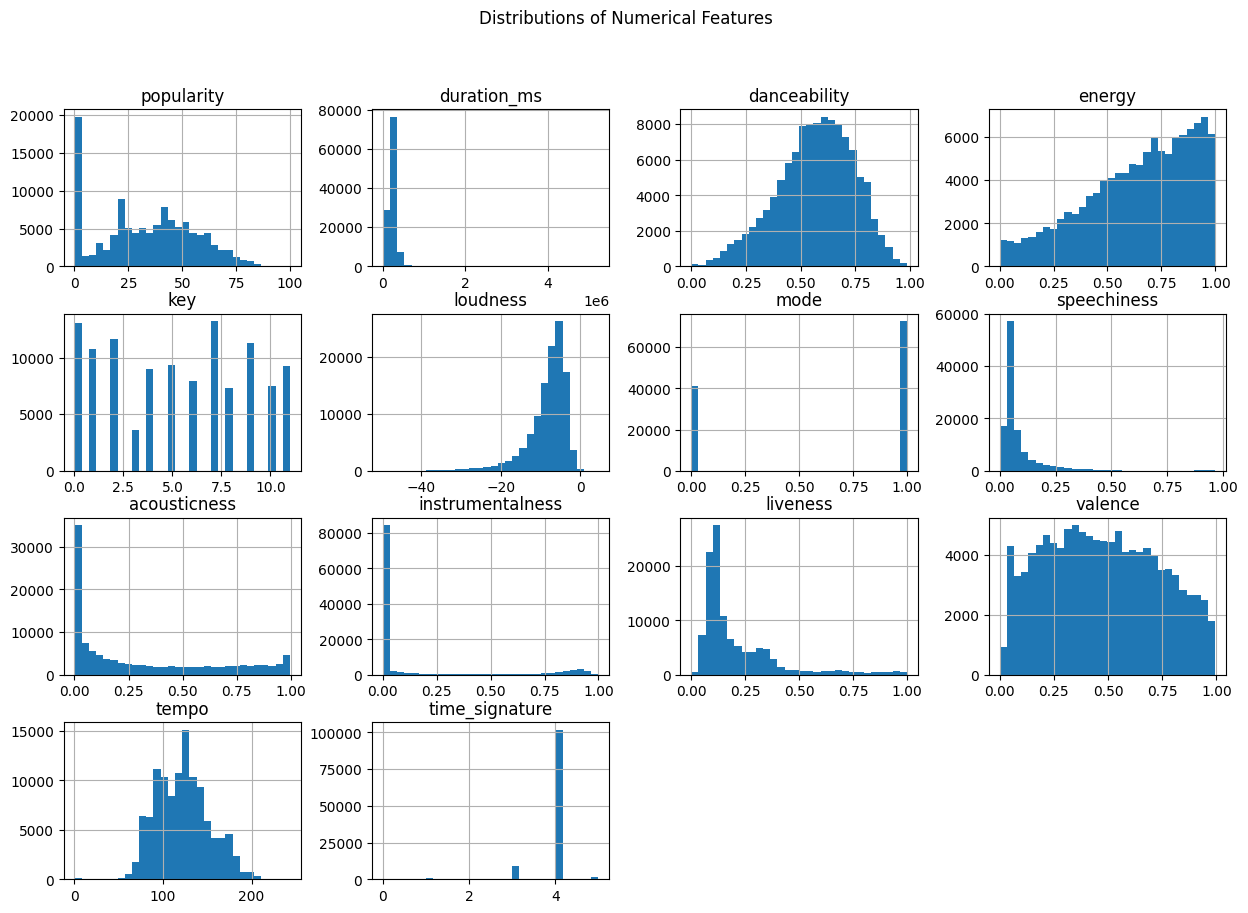

In [444]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features].hist(figsize=(15, 10), bins=30)
plt.suptitle('Distributions of Numerical Features')
plt.show()


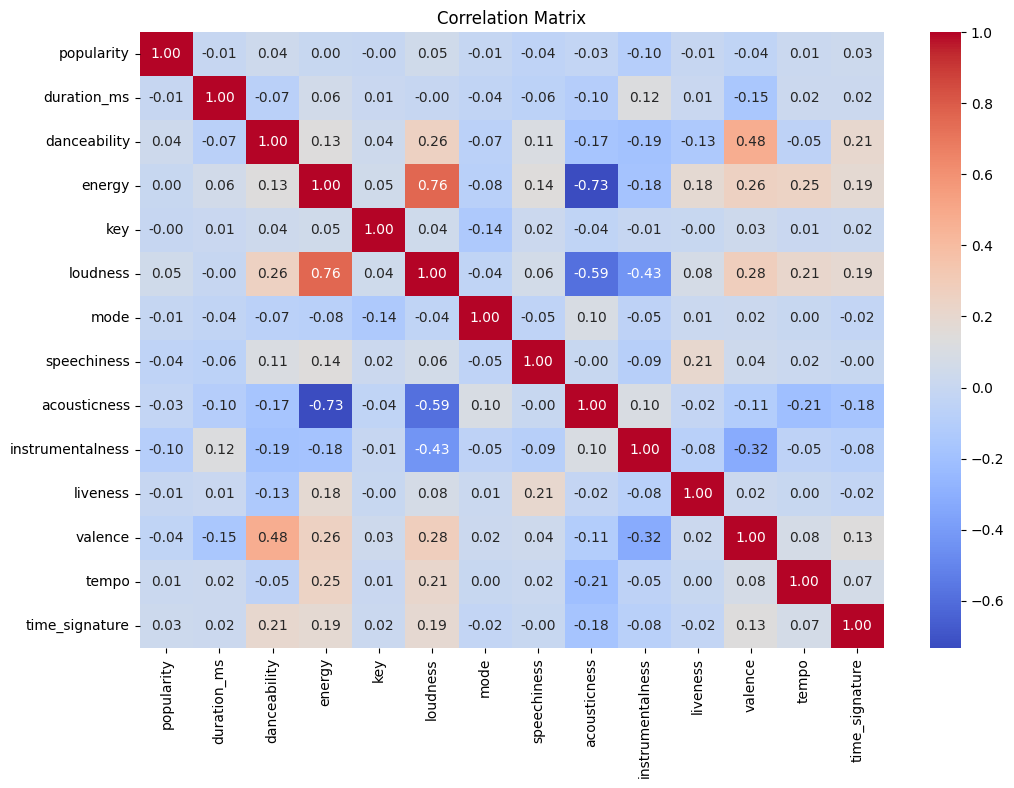

In [445]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Project Check-in 2

In [446]:
response_variable = 'energy'
predictors = ['valence', 'tempo', 'liveness', 'loudness']

# drop rows with missing vals
df = df.dropna(subset=[response_variable] + predictors)

X = df[predictors]
y = df[response_variable]

# split data into test & training sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [447]:
# initialize linear regression model
model = LinearRegression()

# train model
model.fit(X_train, y_train)

# predict on training and validation sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# calculate evaluation metrics
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

print(f"training R2 score: {train_r2}")
print(f"validation R2 score: {val_r2}")
print(f"training MSE: {train_mse}")
print(f"validation MSE: {val_mse}")

training R2 score: 0.6073480432972269
validation R2 score: 0.6027962948212895
training MSE: 0.024873568696761255
validation MSE: 0.02499865023148087


In [448]:
# check if the model is overfitting / underfitting
if train_mse < val_mse:
    print("potential overfitting")
elif train_mse > val_mse:
    print("potential underfitting")
else:
    print("no significant over or underfitting")

potential overfitting


In [449]:
# ridge regression (L2 regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_val_ridge_pred = ridge.predict(X_val)

# lasso regression (L1 regularization)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_val_lasso_pred = lasso.predict(X_val)

# calculate evaluation metrics for ridge and lasso
ridge_r2 = r2_score(y_val, y_val_ridge_pred)
lasso_r2 = r2_score(y_val, y_val_lasso_pred)
ridge_mse = mean_squared_error(y_val, y_val_ridge_pred)
lasso_mse = mean_squared_error(y_val, y_val_lasso_pred)

print(f"ridge validation R2: {ridge_r2}")
print(f"lasso validation R2: {lasso_r2}")
print(f"ridge validation MSE: {ridge_mse}")
print(f"lasso validation MSE: {lasso_mse}")

ridge validation R2: 0.6027967112815098
lasso validation R2: 0.5782999648636854
ridge validation MSE: 0.02499862402089107
lasso validation MSE: 0.02654036592189612


Since the unregularized model (Linear Regression) didn’t show significant overfitting, regularization (Ridge and Lasso) doesn’t seem to improve the performance much in this case. The regularization didn't help because the model wasn't overfitting significantly to begin with (training mse is almost equal to validation mse).

Regularization would be more helpful if: training performance is significantly better than validation performance, showing overfitting. If there was significant overfitting on the original model, after applying regularization, the validation performance should improve (lower MSE, higher R²), and the gap between training and validation performance should narrow.

# Project Check-in 3

In [450]:
lr_all = LogisticRegression(class_weight='balanced', solver='liblinear')
X_train, X_test, y_train, y_test = train_test_split(df[numerical_features], df['explicit'], test_size=0.2, random_state=12345)
y_test = y_test.to_frame()
lr_all.fit(X=X_train, y=y_train)
lr_all.intercept_, lr_all.coef_

(array([0.11348855]),
 array([[ 6.48777850e-03, -4.52530365e-06,  2.43921902e+00,
          4.36255301e-01, -3.03851273e-03,  5.89381580e-02,
         -1.62905989e-01,  5.13782760e+00, -1.60078659e+00,
         -1.52460802e+00, -6.94706141e-02, -1.79758338e+00,
         -1.37381612e-03,  8.92134214e-02]]))

In [451]:
print(type(y_test))
pred_val_sample = pd.DataFrame(dict(
    explicit = y_test['explicit'],
    lr_predict = lr_all.predict_proba(X_test)[:,1],
    lr_predict_binary = lr_all.predict(X_test)))
pred_val_sample

<class 'pandas.core.frame.DataFrame'>


explicit    lr_predict  lr_predict_binary
102399     False  2.469930e-01              False
96198      False  1.487952e-01              False
59541      False  1.322950e-02              False
20787       True  6.762790e-01               True
36287      False  3.096272e-01              False
88675      False  5.063301e-01               True
105911     False  5.941828e-01               True
105758     False  3.722519e-01              False
66407      False  9.090489e-01               True
70506      False  6.376956e-01               True
34092      False  2.624034e-01              False
37549       True  1.879709e-01              False
98158      False  7.640815e-01               True
75497      False  2.740826e-03              False
20025      False  8.062473e-01               True
98908      False  3.795664e-01              False
90474      False  1.488040e-01              False
30286       True  4.180490e-01              False
104700     False  6.067945e-01               True
18199       True  1.109241e-01              False
4163       False  2.144547e-01              False
105992     False  1.912031e-01              False
95284      False  3.009489e-01              False
77296      False  2.873971e-01              False
63302      False  5.335829e-01               True
90328      False  3.014209e-01              False
111701     False  5.090021e-01               True
26321      False  5.039584e-02              False
14506      False  6.344573e-01               True
13662      False  1.398920e-01              False
113636     False  7.399955e-03              False
102899     False  1.024862e-01              False
12598      False  2.413844e-01              False
18322       True  9.728444e-01               True
107548     False  1.412910e-01              False
58675      False  4.551492e-01              False
3536        True  6.304568e-01               True
110409     False  5.678765e-01               True
11214      False  6.244739e-01               True
34779      False  1.791682e-01              False
39271      False  1.967846e-02              False
50998      False  2.276338e-01              False
45020       True  2.166375e-01              False
5805       False  1.737567e-02              False
80313      False  2.685278e-01              False
40942      False  3.987560e-01              False
20319      False  4.385769e-01              False
26385      False  3.603496e-01              False
97954      False  3.839562e-01              False
68660      False  7.185005e-01               True
39884      False  5.463546e-01               True
72709      False  4.692687e-01              False
6304       False  2.205386e-01              False
50017      False  2.066909e-01              False
105475     False  1.378746e-01              False
74081      False  7.831921e-02              False
34582      False  1.340342e-01              False
72672       True  6.371423e-01               True
16055      False  2.838328e-02              False
43309      False  3.413570e-01              False
16216      False  4.742145e-03              False
7937       False  9.794211e-02              False
60179       True  7.806764e-01               True
77907      False  2.224092e-01              False
67101      False  7.937722e-01               True
581        False  3.370942e-01              False
40407      False  3.300841e-01              False
38358      False  6.502662e-01               True
43153      False  4.640866e-01              False
112085     False  3.499785e-01              False
41798      False  1.996772e-01              False
81448      False  6.028153e-01               True
15793      False  6.000260e-01               True
101609     False  9.642988e-02              False
26438      False  4.607102e-02              False
92650      False  1.458717e-01              False
80360      False  4.736191e-01              False
17049      False  6.044036e-01               True
50832      False  3.977950e-01              False
67655   

In [452]:
conf_lr = metrics.confusion_matrix(y_true=pred_val_sample['explicit'],
                                   y_pred=pred_val_sample['lr_predict_binary'])
conf_lr

array([[14688,  6127],
       [  489,  1496]])

In [453]:
# Logistic regression Accuracy
(conf_lr[0, 0] + conf_lr[1, 1]) / conf_lr.sum()

0.7098245614035088

In [454]:
# Logistic regression Accuracy alternative
metrics.accuracy_score(y_true=pred_val_sample['explicit'],
                       y_pred=pred_val_sample['lr_predict_binary'])

0.7098245614035088

In [455]:
# precision
conf_lr[1, 1] / (conf_lr[1, 1] + conf_lr[0, 1])

0.19624819624819625

In [456]:
# recall score for positive classs
(conf_lr[1, 1]) / conf_lr[1,:].sum()

0.7536523929471033

In [457]:
# recall score for positive class alternative
metrics.recall_score(y_true=pred_val_sample['explicit'],
                     y_pred=pred_val_sample['lr_predict_binary'])

0.7536523929471033

In [458]:
# recall score for negative class alternative
(conf_lr[0, 0]) / conf_lr[0,:].sum()

0.7056449675714629

In [459]:
# recall score for negative class
metrics.recall_score(y_true=pred_val_sample['explicit'],
                     y_pred=pred_val_sample['lr_predict_binary'],
                     pos_label=0)

0.7056449675714629

In [460]:
px.histogram(pred_val_sample, x='lr_predict', color='explicit',
             nbins=20, opacity=0.5,
             barmode='overlay')

Poor results without utilizing feature selection.

# Project Check In 5:
**How are we using PCA in our project?**

We are using PCA for dimensionality reduction to simplify the high-dimensional Spotify dataset. This is done through transforming correlated numerical features into a smaller set of uncorrelated features to model on. This allows us to retain the majority of the data's variance at the same time as improve the model's efficiency. PCA helps us learn structure in the data by identifying clusters of genres in the principal component space which shows us the relationships between audio features and the genre of the song.

In [461]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# scale our numerical features so mean is 0 and variance is 1:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df[numerical_features])

# compute first pca model on our standardized data to figure out how many components to use
first_pca = PCA()
first_pca.fit(standardized_data)

# compute the cumulative explained variance for each principal component:
explained_variance_ratio = first_pca.explained_variance_ratio_  # get the proportion of total variance explained by each principal
cumulative_explained_variance = np.cumsum(explained_variance_ratio) # calculate the cumulative sum of an array


The first 10 compenents explain about 88% of the variance and the first 11 components explain 93%. A good threshold is about 90% so we'll use 11 components.

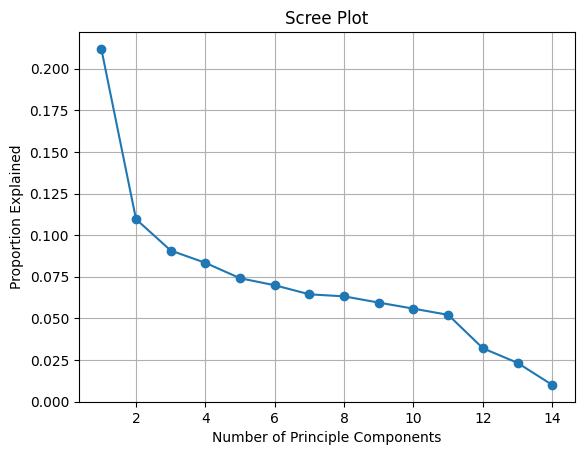

In [462]:
proportion_explained = explained_variance_ratio / sum(explained_variance_ratio)

plt.plot(range(1, len(proportion_explained) + 1), proportion_explained, marker = 'o', linestyle = '-')
plt.title('Scree Plot')
plt.xlabel('Number of Principle Components')
plt.ylabel('Proportion Explained')
plt.grid(True)
plt.show()

In [463]:
pca = PCA(n_components=11)
pca_result = pca.fit_transform(standardized_data)

eigenvalues = pca.explained_variance_ # variance explained per component

eigen_df = pd.DataFrame({
    'Eigenvalue': eigenvalues,
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Explained Variance': np.cumsum(pca.explained_variance_ratio_)
})
print(eigen_df.head(11))

    Eigenvalue  Explained Variance Ratio  Cumulative Explained Variance
0     2.967197                  0.211941                       0.211941
1     1.534671                  0.109618                       0.321559
2     1.270808                  0.090771                       0.412330
3     1.167148                  0.083367                       0.495697
4     1.037470                  0.074104                       0.569802
5     0.978550                  0.069896                       0.639698
6     0.902253                  0.064446                       0.704144
7     0.885015                  0.063215                       0.767358
8     0.832489                  0.059463                       0.826821
9     0.781411                  0.055815                       0.882636
10    0.729568                  0.052112                       0.934747


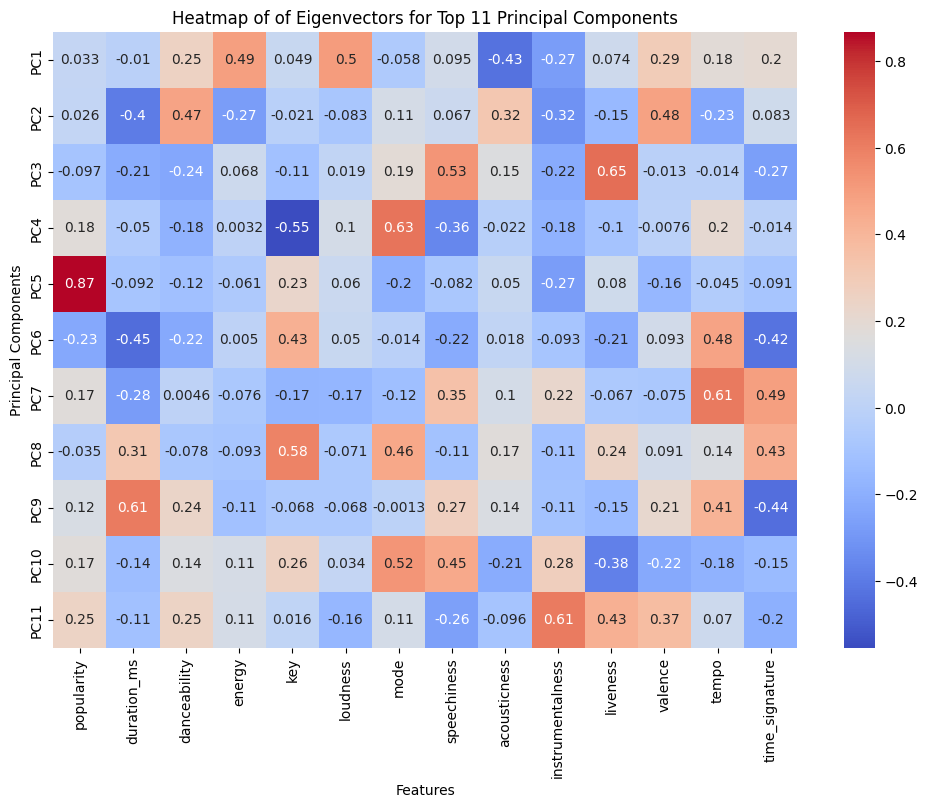

In [464]:
eigenvectors = pca.components_  # Shape: (11 components, n_features)

plt.figure(figsize=(12, 8))
sns.heatmap(eigenvectors, annot=True, cmap='coolwarm', xticklabels=numerical_features, yticklabels=[f'PC{i+1}' for i in range(11)])
plt.title('Heatmap of of Eigenvectors for Top 11 Principal Components')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()

Example analysis:
- Energy (0.49) and loudness (0.5) are the most influential features defining PC1. PC1 accounts for about 21% of the total variance, so that means 21% of the data's variability can attributed to variations of energy and loudness.

# Project Check-in 6
Application of a neural network- Classification of track genre utilizing all numerical features.



In [465]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [466]:
X_tensor = torch.from_numpy(standardized_data).to(torch.float32)
y_tensor = torch.from_numpy(df['track_genre'].astype('category').cat.codes.values.copy())
y_tensor = y_tensor.to(torch.int64)
print("X_tensor:", X_tensor.shape, X_tensor.dtype)
print("y_tensor:", y_tensor.shape, y_tensor.dtype)

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
joint_dataset = JointDataset(X_tensor, y_tensor)
train_loader = DataLoader(joint_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(joint_dataset, batch_size=64, shuffle=True)
# Define a neural network for Spotify
class Spotify(nn.Module):
    def __init__(self):
        super(Spotify, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(14, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 114)
        )

    def forward(self, x):
        return self.model(x)

X_tensor: torch.Size([114000, 14]) torch.float32
y_tensor: torch.Size([114000]) torch.int64


In [467]:
# Initialize model, loss, and optimizer
### To-do ###
spotify_model = Spotify()
spotify_loss_fn = nn.CrossEntropyLoss()
spotify_optimizer = optim.Adam(spotify_model.parameters(), lr=0.001)

In [ ]:
# Training the Spotify model
### Training takes a while ###
epochs = 20
for epoch in range(epochs):
    total_loss = 0
    for features, labels in train_loader:
        # Forward pass
        predictions = spotify_model(features)
        loss = spotify_loss_fn(predictions, labels)
        pass

        # Backward pass
        spotify_optimizer.zero_grad()
        loss.backward()
        spotify_optimizer.step()

        total_loss += loss.item()
        pass

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {total_loss / len(train_loader):.4f}")

Epoch [1/20], Loss: 3.2993
Epoch [2/20], Loss: 2.8746
Epoch [3/20], Loss: 2.7463
Epoch [4/20], Loss: 2.6731
Epoch [5/20], Loss: 2.6236
Epoch [6/20], Loss: 2.5834


In [ ]:
# Evaluating on test data
correct = 0
total = 0
with torch.no_grad():
    for features, labels in test_loader:
        ### To-do ###
        predictions = spotify_model(features)
        _, predicted = torch.max(predictions.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        pass

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

2. Our metrics for evaluation are loss and accuracy. Loss refers to how well our model is fitting to the training data, whereas accuracy evaluates how well our model is actually performing on real data.

3. Training was attempted with batch sizes of 64, hidden layer sizes of 14-128-64-114, and a learning rate of 0.001. Achieved relatively high loss rates of 2.4 after 20 epochs. Adjusting learning rate to 0.005 gave us even worse results. Returned learning rate back to 0.001 and modified the hidden layers to be more complex to 14-256-128-114, which very slightly improved our loss to 2.38. This gave us an unacceptable accuracy rate of 35.69%.